<IPython.core.display.Javascript object>


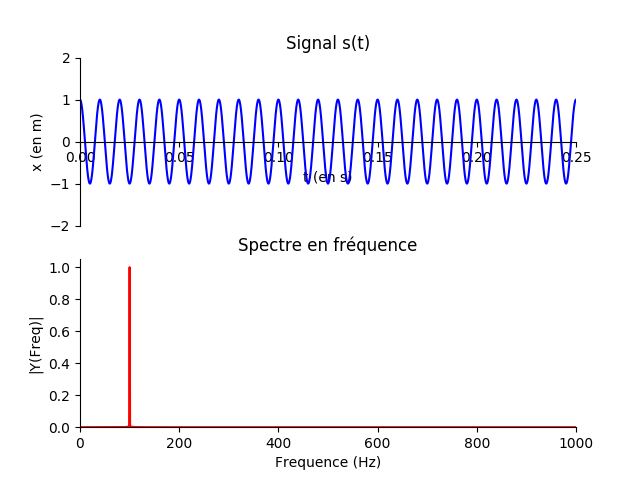

interactive(children=(FloatSlider(value=1.0, description='A', max=2.0, min=0.1), IntSlider(value=100, descript…

In [1]:
%matplotlib notebook
#En dynamique
from math import cos,pi,sin,atan2
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from ipywidgets import interact, widgets
import matplotlib.gridspec as gridspec
from scipy import fft, arange
from numpy import sin, linspace, pi

fig = plt.figure()
gs = gridspec.GridSpec(2, 1)
ax1 = fig.add_subplot(gs[0,:])
ax2 = fig.add_subplot(gs[1,:])
fig.show() 

t = [0.0001*i for i in range(10001)]



def f1(t):
    global ampl,freq,form
    if form =="sinus":
        return ampl*cos(2*pi*freq*t)
    elif form =="triangle":
        T = 1/freq
        t2 = t%T
        if t2<T/4:
            return t2*4*ampl/T
        elif t2<3*T/4:
            return ampl-(t2-T/4)*4*ampl/T
        else:
            return -ampl+(t2-3*T/4)*4*ampl/T
    elif form=="carre":
        T = 1/freq
        t2 = t%T
        if t2==0:
            return 0
        elif t2<T/2:
            return +ampl
        else:
            return -ampl

    
def trace():
    global t,freq
    xcos=[]
    xsin=[]
    xsomme=[]
    x2=[]
    for val in t:
        xcos.append(f1(val))
    
    ax1.clear()
    ax2.clear()
      
    ax1.spines['right'].set_color('none')
    ax1.spines['top'].set_color('none')
    ax1.spines['bottom'].set_position(('data',0))
    ax1.spines['left'].set_position(('data',0))
    ax1.xaxis.set_ticks_position('bottom')
    ax1.yaxis.set_ticks_position('left')
    ax1.set_xlabel("t (en s)")
    ax1.set_ylabel("x (en m)")
    ax1.set_xlim([0,0.25])
    ax1.set_title("Signal s(t)")
    ax1.set_ylim([-2,2])#[min(-0.025,li-1.05*xm),li+1.05*xm])
    #ax1.set_xticks([0,10,20])
    
    ax1.plot(t,xcos,"blue")
    #ax1.plot(t,xsin,"red",label="$B\sin(\omega t)$")
    #ax1.plot(t,xsomme,"green",label="$A\cos(\omega t)+B\sin(\omega t)$")
    
    n = len(xcos)
    k = arange(n)
    T = n/10001
    frq = k/T # two sides frequency range
    frq = frq[range(n//2)] # one side frequency range
    Y = fft(xcos)/(n//2) # fft computing and normalization
    Y = Y[range(n//2)]
    ax2.spines['right'].set_color('none')
    ax2.spines['top'].set_color('none')
    ax2.spines['bottom'].set_position(('data',0))
    ax2.spines['left'].set_position(('data',0))
    ax2.xaxis.set_ticks_position('bottom')
    ax2.yaxis.set_ticks_position('left')
    ax2.set_xlabel("Frequence (Hz)")
    ax2.set_ylabel("|Y(Freq)|")
    ax2.set_xlim([0,1050])
    ax2.set_title("Spectre en fréquence")
    ax2.set_ylim([0,1.05*max(abs(Y))])#[min(-0.025,li-1.05*xm),li+1.05*xm])
   # ax2.set_xticks([0,10,20])
    ax2.plot(frq,abs(Y),'r')
    #ax2.plot(t,x2,"green",label="$C\cos(\omega t + \phi)$")
    #ax2.legend(framealpha=1.)
  
@interact(A=(0.1,2.,0.1),f=(20,200,5),forme=["sinus","triangle","carre"])
def setx0(A=1.,f=100,forme="sinus"):
    global ampl,freq,form
    ampl = A
    freq = f
    form = forme
    trace()  
    
trace()